In [1]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' # I use a Mac

import numpy as np
import matplotlib.pyplot as plt
import fishchips.experiments_change as experiments
import fishchips.util
from fishchips.plots import plot_ell


In [2]:
# Get all data points for all parameters
# from output .dat files

# after "=" write path to the .dat file with Pk data (..._pk) or Cl data (..._cl)
# Output files (from .ini files above) I used are in PT-check/class/test_output/
# for example, lcdm_pk = "/Users/aizhan.akh/Documents/Projects/PT-check/class/test_output/lcdm_pk.dat"

# for LCDM
fiducial_data = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/lcdm_pt_cl_lensed.dat")[:,:]

# for dmeff
dmeff_data = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/lcdm_pt_dmeffcl_lensed.dat")[:,:]

#for omega_b              
omega_b_l_data = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/lcdm_pt_l_omega_b_cl_lensed.dat")[:,:]
omega_b_r_data = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/lcdm_pt_r_omega_b_cl_lensed.dat")[:,:]

#for omega_cdm             
omega_cdm_l_data = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/lcdm_pt_l_omega_cdm_cl_lensed.dat")[:,:] 
omega_cdm_r_data = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/lcdm_pt_r_omega_cdm_cl_lensed.dat")[:,:] 

#for tau              
tau_l_data = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/lcdm_pt_l_tau_cl_lensed.dat")[:,:] 
tau_r_data = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/lcdm_pt_r_tau_cl_lensed.dat")[:,:]

#for h             
h_l_data = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/lcdm_pt_l_h_cl_lensed.dat")[:,:] 
h_r_data = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/lcdm_pt_r_h_cl_lensed.dat")[:,:]

#for As              
As_l_data = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/lcdm_pt_l_As_cl_lensed.dat")[:,:] 
As_r_data = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/lcdm_pt_r_As_cl_lensed.dat")[:,:]

#for ns              
ns_l_data = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/lcdm_pt_l_ns_cl_lensed.dat")[:,:] 
ns_r_data = np.genfromtxt("/u/aizhana/Projects/CodeCombined/Fisher/output/lcdm_pt_r_ns_cl_lensed.dat")[:,:]

In [3]:
pars = np.array( ['omega_b', 'omega_cdm', 'h',  'A_s', 'n_s', 'tau_reio', 'sigma_dmeff'])
centers = np.array([0.02230,  0.1188,  0.6774,  2.142e-9, 0.9619, 0.66, 0.0])
steps = np.array([0.0002230,  0.001188,  0.006774,  2.142e-11, 0.009619, 0.0066, 2.1e-26])

In [4]:
fiducial = {}
dmeff = {}       
omega_b_l = {}
omega_b_r = {} 
omega_cdm_l = {} 
omega_cdm_r = {}             
tau_l = {}
tau_r = {}           
h_l = {}
h_r = {}            
As_l = {}
As_r = {} 
ns_l = {}
ns_r = {}

channels = ['ell', 'tt', 'ee', 'te', 'bb', 'pp', 'tp', 'ep']
for i in channels:
    j = channels.index(i)
    fiducial[i] = fiducial_data[:, j]
    dmeff[i] = dmeff_data[:, j]       
        
    omega_b_l[i] = omega_b_l_data[:, j] 
    omega_b_r[i] = omega_b_r_data[:, j] 
        
    omega_cdm_l[i] = omega_cdm_l_data[:, j]  
    omega_cdm_r[i] = omega_cdm_r_data[:, j]              
        
    tau_l[i] = tau_l_data[:, j]
    tau_r[i] = tau_r_data[:, j]             
        
    h_l[i] = h_l_data[:, j] 
    h_r[i] = h_r_data[:, j]             
        
    As_l[i] = As_l_data[:, j] 
    As_r[i] = As_r_data[:, j]
        
    ns_l[i] = ns_l_data[:, j] 
    ns_r[i] = ns_r_data[:, j]
        
        

In [5]:
cl_left = []
cl_right = []

cl_left.append(omega_b_l)
cl_left.append(omega_cdm_l)
cl_left.append(h_l)
cl_left.append(As_l)
cl_left.append(ns_l)
cl_left.append(tau_l)
cl_left.append(fiducial)

cl_right.append(omega_b_r)
cl_right.append(omega_cdm_r)
cl_right.append(h_r)
cl_right.append(As_r)
cl_right.append(ns_r)
cl_right.append(tau_r)
cl_right.append(dmeff)

#cl_right[1]['tt']

In [6]:
example = experiments.CMB_Primary()
fisher = example.get_fisher_changed(fiducial, pars, cl_right, cl_left, steps)
cov = np.linalg.inv(fisher)

generating new axis
['$\\mathrm{omega\\_b}$', '$\\mathrm{omega\\_cdm}$', '$\\mathrm{h}$', '$\\mathrm{A\\_s}$', '$\\mathrm{n\\_s}$', '$\\mathrm{tau\\_reio}$', '$\\mathrm{sigma\\_dmeff}$']


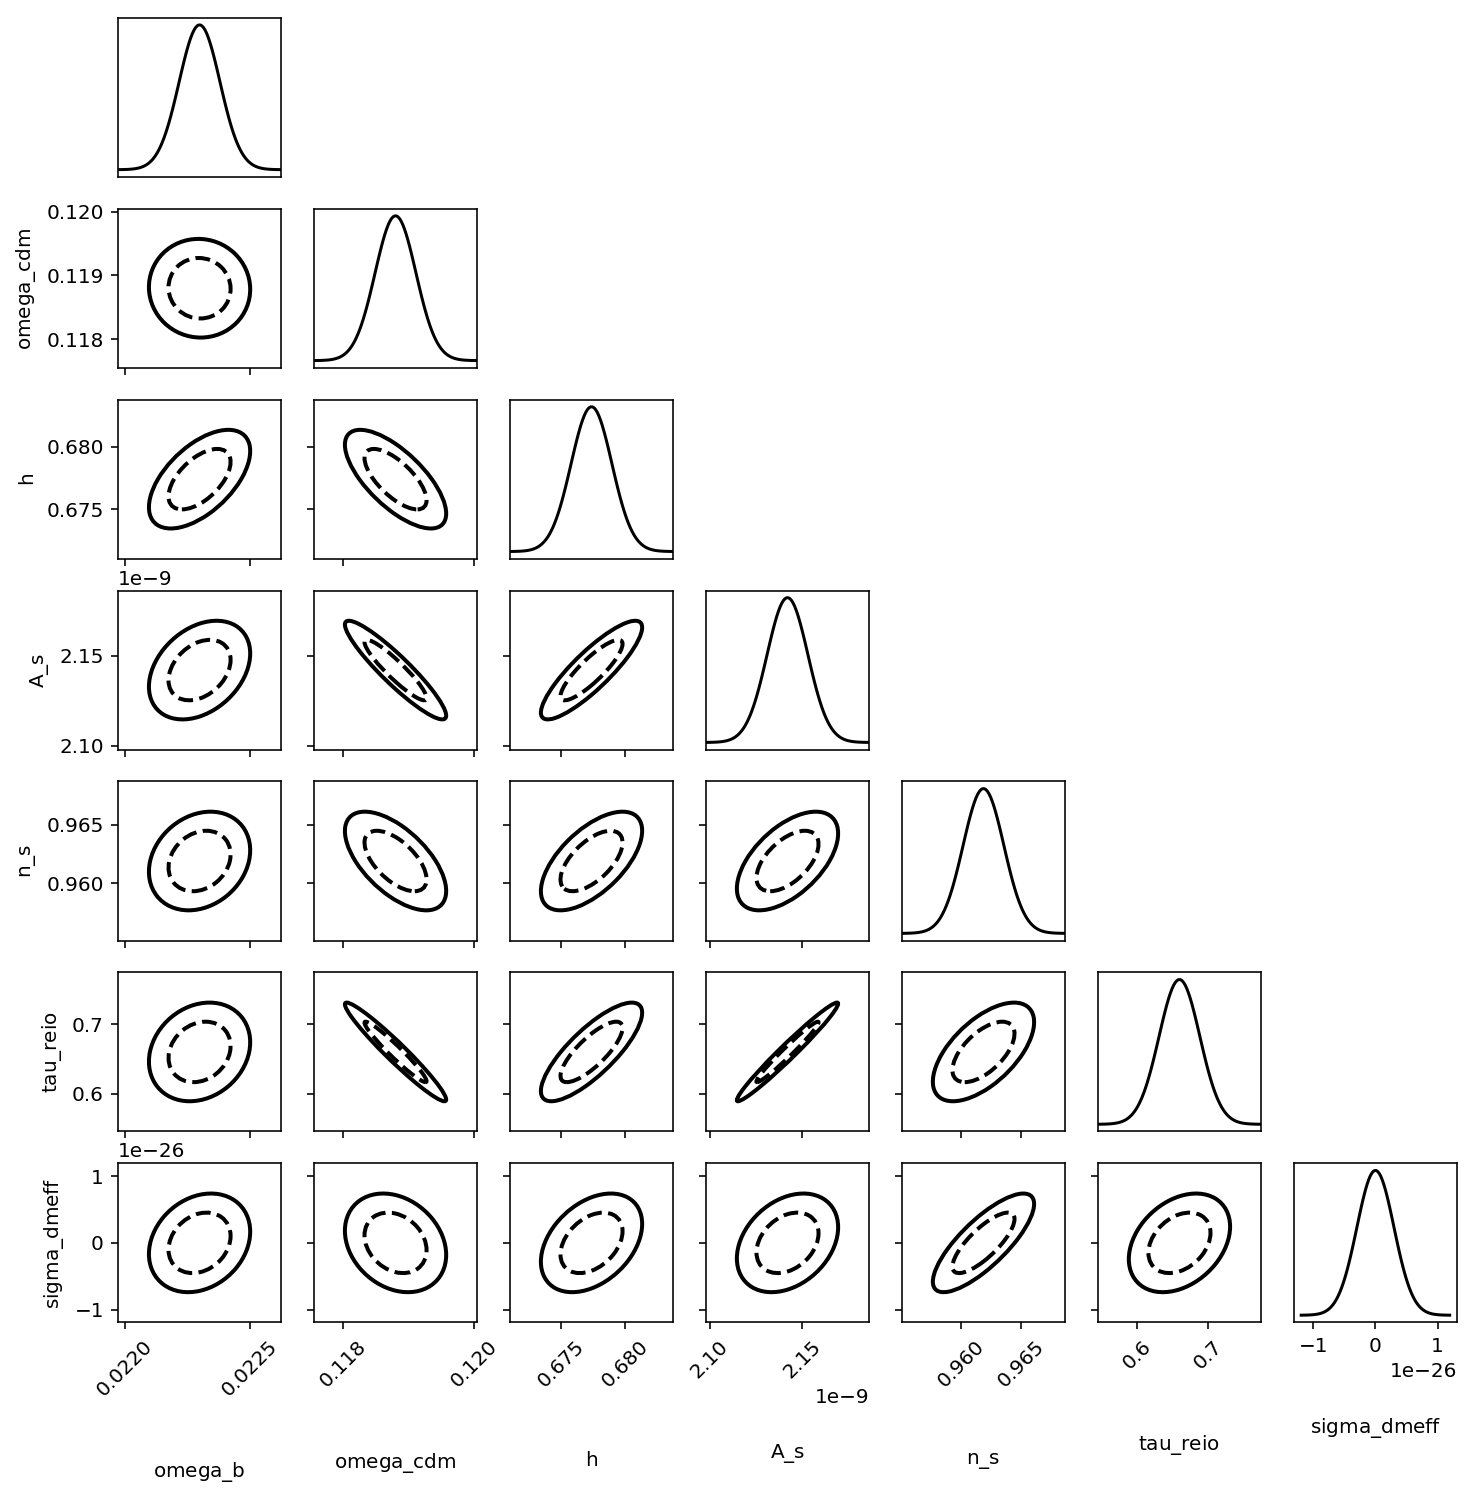

In [7]:
plot_ell(pars, centers, cov)

In [9]:
example_Planck = experiments.get_PlanckPol_combine()
fisher = example_Planck[0].get_fisher_changed(fiducial, pars, cl_right, cl_left, steps)+example_Planck[1].get_fisher_changed(fiducial, pars, cl_right, cl_left, steps)+example_Planck[2].get_fisher_changed(fiducial, pars, cl_right, cl_left, steps)
cov = np.linalg.inv(fisher)

generating new axis
['$\\mathrm{omega\\_b}$', '$\\mathrm{omega\\_cdm}$', '$\\mathrm{h}$', '$\\mathrm{A\\_s}$', '$\\mathrm{n\\_s}$', '$\\mathrm{tau\\_reio}$', '$\\mathrm{sigma\\_dmeff}$']


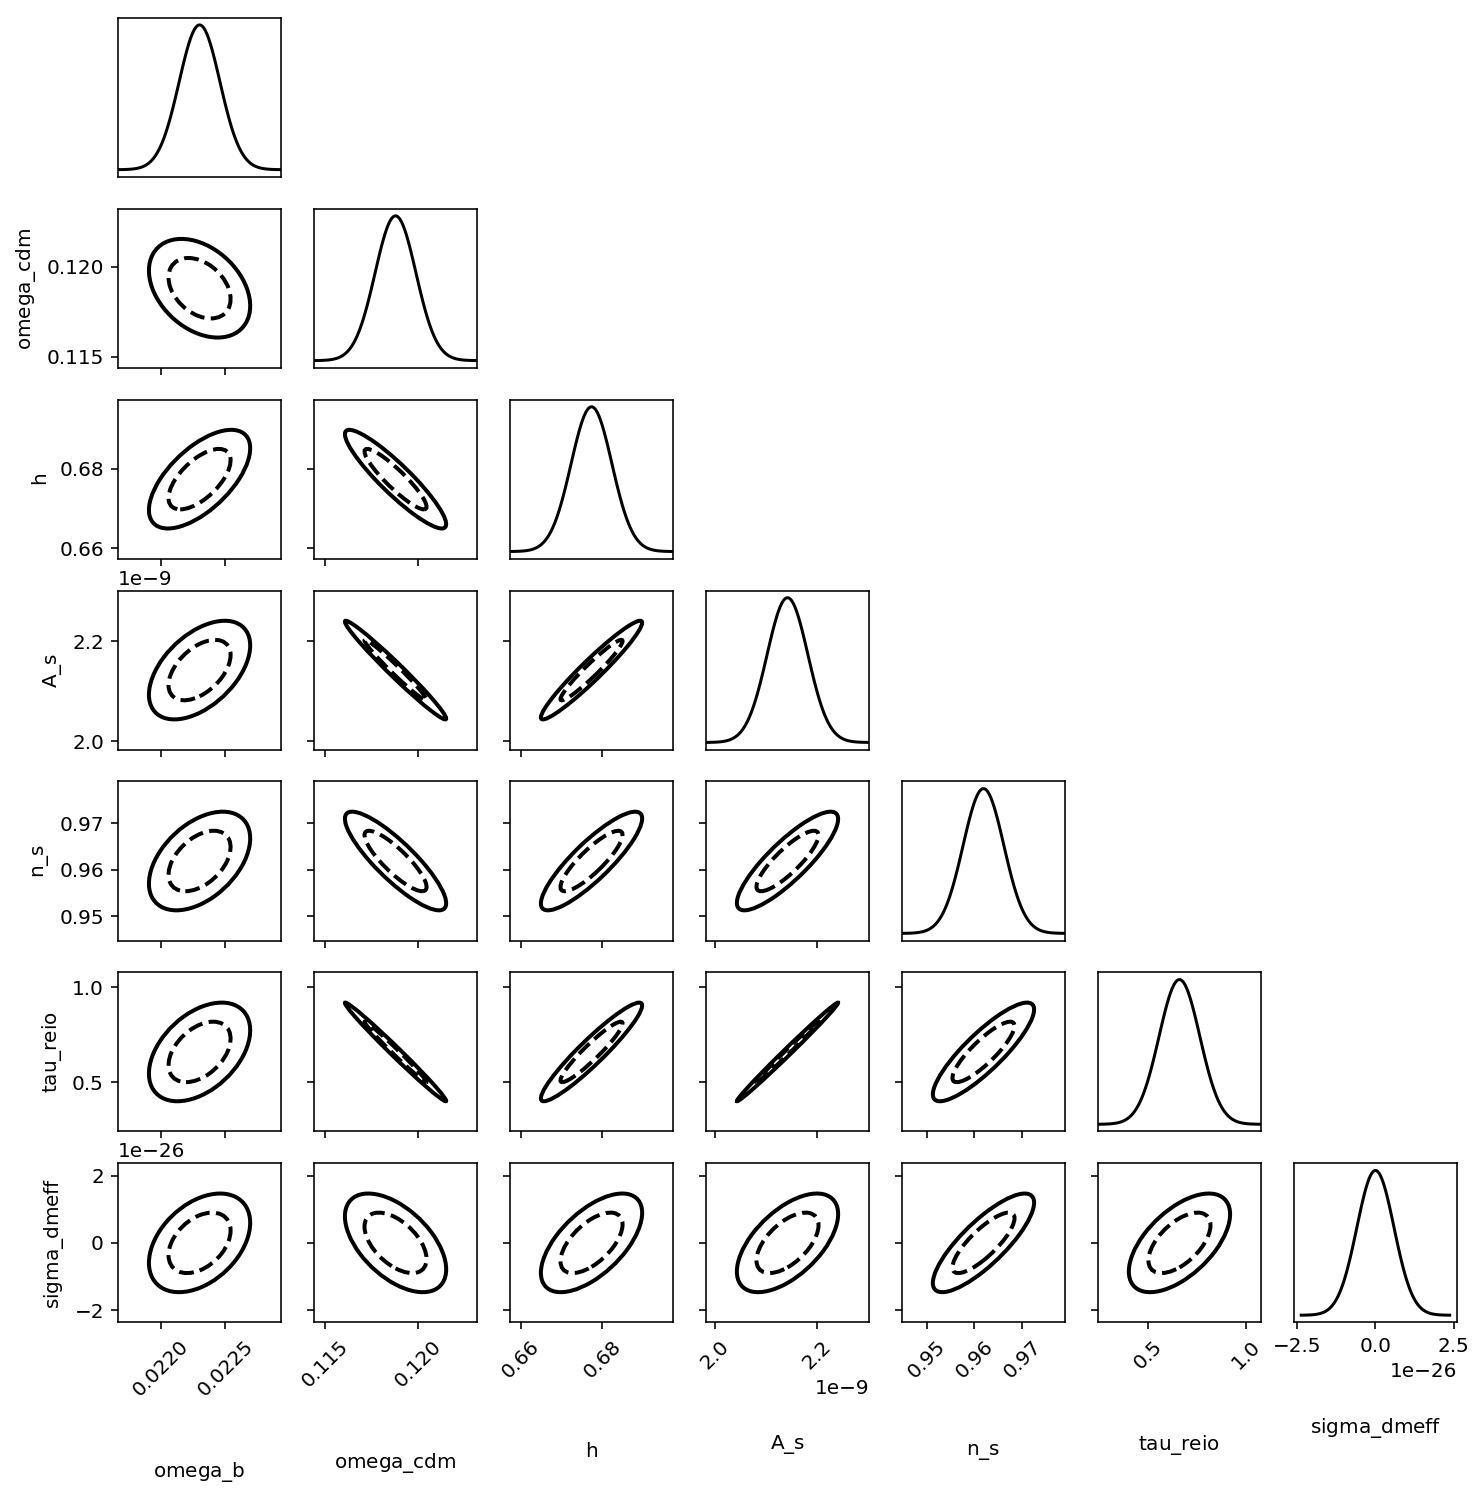

In [10]:
# plot Fisher Forecasts for Planck data
plot_ell(pars, centers, cov)

In [15]:
example_S3 = experiments.get_S3()
fisher_S3 = example_S3[0].get_fisher_changed(fiducial, pars, cl_right, cl_left, steps)
#example_S3[2].get_fisher_changed(fiducial, pars, cl_right, cl_left, steps)+\
#example_S3[3].get_fisher_changed(fiducial, pars, cl_right, cl_left, steps)+example_S3[4].get_fisher_changed(fiducial, pars, cl_right, cl_left, steps)
cov_S3 = np.linalg.inv(fisher_S3)

IndexError: index 2499 is out of bounds for axis 0 with size 2499

In [13]:
example_S3